In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
team_df_dropped_row = pd.read_parquet('parquet_data/team_df_missing_handled.parquet')

team_df_dropped_row.head()

,Date,Opponent,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,Aces,SErr,Digs,RErr,Block Assists,PTS,name
0,08/26/2016,"Prairie View @ Waco, Texas",W 3 - 0,3.0,46.0,13.0,107.0,0.308,40.0,6.0,11.0,51.0,3.0,2.0,53.0,A&M-Corpus Christi (Southland)
1,08/27/2016,@ Baylor,L 1 - 3,4.0,37.0,20.0,119.0,0.143,32.0,5.0,6.0,46.0,5.0,18.0,53.0,A&M-Corpus Christi (Southland)
2,09/03/2016,"San Diego @ Madison, Wis.",L 0 - 3,3.0,30.0,16.0,94.0,0.149,29.0,1.0,3.0,32.0,1.0,15.0,42.5,A&M-Corpus Christi (Southland)
3,09/06/2016,UTRGV,W 3 - 1,4.0,53.0,20.0,158.0,0.209,49.0,3.0,9.0,66.0,2.0,16.0,66.0,A&M-Corpus Christi (Southland)
4,09/09/2016,UNLV,L 1 - 3,4.0,44.0,30.0,166.0,0.084,42.0,1.0,3.0,66.0,2.0,8.0,52.0,A&M-Corpus Christi (Southland)


In [3]:
player_df_dropped_row = pd.read_parquet('parquet_data\player_df_missing_handled.parquet')
player_df_dropped_row.head()

,Date,Opponent,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,SErr,Digs,Block Assists,PTS,name,team_name
0,09/17/2016,@ Yale,L 1 - 3,4.0,14.0,3.0,37.0,0.297,3.0,1.0,5.0,3.0,16.5,"Carlson, Morgan",A&M-Corpus Christi (Southland)
1,10/15/2016,Lamar University,W 3 - 0,3.0,8.0,3.0,20.0,0.250,3.0,1.0,3.0,4.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)
2,10/20/2016,@ New Orleans,W 3 - 1,4.0,9.0,3.0,21.0,0.286,1.0,2.0,5.0,3.0,11.5,"Carlson, Morgan",A&M-Corpus Christi (Southland)
3,11/03/2016,McNeese,W 3 - 0,3.0,9.0,1.0,17.0,0.471,1.0,1.0,6.0,2.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)
4,11/12/2016,@ Houston Baptist,W 3 - 1,4.0,7.0,6.0,21.0,0.048,1.0,2.0,8.0,4.0,9.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)


In [4]:
team_df_dropped_row['Success'] = team_df_dropped_row['Result'].apply(
    lambda x: 1 if isinstance(x, str) and x.startswith('W') else (0 if isinstance(x, str) and x.startswith('L') else None)
)
team_df_dropped_row

,Date,Opponent,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,Aces,SErr,Digs,RErr,Block Assists,PTS,name,Success
0,08/26/2016,"Prairie View @ Waco, Texas",W 3 - 0,3.0,46.0,13.0,107.0,0.308,40.0,6.0,11.0,51.0,3.0,2.0,53.0,A&M-Corpus Christi (Southland),1
1,08/27/2016,@ Baylor,L 1 - 3,4.0,37.0,20.0,119.0,0.143,32.0,5.0,6.0,46.0,5.0,18.0,53.0,A&M-Corpus Christi (Southland),0
2,09/03/2016,"San Diego @ Madison, Wis.",L 0 - 3,3.0,30.0,16.0,94.0,0.149,29.0,1.0,3.0,32.0,1.0,15.0,42.5,A&M-Corpus Christi (Southland),0
3,09/06/2016,UTRGV,W 3 - 1,4.0,53.0,20.0,158.0,0.209,49.0,3.0,9.0,66.0,2.0,16.0,66.0,A&M-Corpus Christi (Southland),1
4,09/09/2016,UNLV,L 1 - 3,4.0,44.0,30.0,166.0,0.084,42.0,1.0,3.0,66.0,2.0,8.0,52.0,A&M-Corpus Christi (Southland),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35350,11/01/2019,Cleveland St.,L 0 - 3,3.0,27.0,17.0,101.0,0.099,27.0,3.0,3.0,38.0,5.0,8.0,34.0,Youngstown St. (Horizon),0
35351,11/03/2019,@ Oakland,L 0 - 3,3.0,26.0,22.0,119.0,0.034,24.0,5.0,7.0,40.0,4.0,6.0,35.0,Youngstown St. (Horizon),0
35352,11/06/2019,IUPUI,L 2 - 3,5.0,56.0,20.0,149.0,0.242,53.0,8.0,8.0,63.0,8.0,12.0,71.0,Youngstown St. (Horizon),0
35353,11/15/2019,Wright St.,L 0 - 3,3.0,28.0,19.0,113.0,0.080,27.0,1.0,4.0,43.0,6.0,6.0,32.0,Youngstown St. (Horizon),0


In [5]:
team_df_dropped_row['Success'].isnull().sum()

0

In [6]:
X = team_df_dropped_row[['S', 'Kills', 'Errors', 'Total Attacks', 'Hit Pct', 'Assists', 
                         'Aces', 'SErr', 'Digs', 'RErr', 'Block Assists', 'PTS']]  # Relevant columns
y = team_df_dropped_row['Success']

In [7]:
X = X.dropna()
y = y[X.index]

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      3507
           1       0.85      0.86      0.86      3564

    accuracy                           0.86      7071
   macro avg       0.86      0.86      0.86      7071
weighted avg       0.86      0.86      0.86      7071



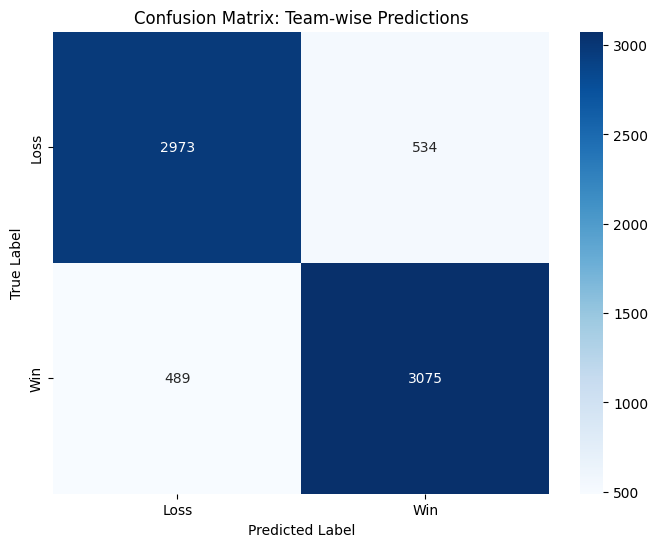

In [11]:
cm_team = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_team, annot=True, fmt="d", cmap="Blues", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.title("Confusion Matrix: Team-wise Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [12]:
player_df_dropped_row.head()

,Date,Opponent,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,SErr,Digs,Block Assists,PTS,name,team_name
0,09/17/2016,@ Yale,L 1 - 3,4.0,14.0,3.0,37.0,0.297,3.0,1.0,5.0,3.0,16.5,"Carlson, Morgan",A&M-Corpus Christi (Southland)
1,10/15/2016,Lamar University,W 3 - 0,3.0,8.0,3.0,20.0,0.250,3.0,1.0,3.0,4.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)
2,10/20/2016,@ New Orleans,W 3 - 1,4.0,9.0,3.0,21.0,0.286,1.0,2.0,5.0,3.0,11.5,"Carlson, Morgan",A&M-Corpus Christi (Southland)
3,11/03/2016,McNeese,W 3 - 0,3.0,9.0,1.0,17.0,0.471,1.0,1.0,6.0,2.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)
4,11/12/2016,@ Houston Baptist,W 3 - 1,4.0,7.0,6.0,21.0,0.048,1.0,2.0,8.0,4.0,9.0,"Carlson, Morgan",A&M-Corpus Christi (Southland)


In [13]:
player_df_dropped_row['Success'] = player_df_dropped_row['Result'].apply(
    lambda x: 1 if isinstance(x, str) and x.startswith('W') else (0 if isinstance(x, str) and x.startswith('L') else None)
)
player_df_dropped_row

,Date,Opponent,Result,S,Kills,Errors,Total Attacks,Hit Pct,Assists,SErr,Digs,Block Assists,PTS,name,team_name,Success
0,09/17/2016,@ Yale,L 1 - 3,4.0,14.0,3.0,37.0,0.297,3.0,1.0,5.0,3.0,16.5,"Carlson, Morgan",A&M-Corpus Christi (Southland),0
1,10/15/2016,Lamar University,W 3 - 0,3.0,8.0,3.0,20.0,0.250,3.0,1.0,3.0,4.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland),1
2,10/20/2016,@ New Orleans,W 3 - 1,4.0,9.0,3.0,21.0,0.286,1.0,2.0,5.0,3.0,11.5,"Carlson, Morgan",A&M-Corpus Christi (Southland),1
3,11/03/2016,McNeese,W 3 - 0,3.0,9.0,1.0,17.0,0.471,1.0,1.0,6.0,2.0,10.0,"Carlson, Morgan",A&M-Corpus Christi (Southland),1
4,11/12/2016,@ Houston Baptist,W 3 - 1,4.0,7.0,6.0,21.0,0.048,1.0,2.0,8.0,4.0,9.0,"Carlson, Morgan",A&M-Corpus Christi (Southland),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30796,11/08/2019,@ Green Bay,L 0 - 3,3.0,9.0,8.0,32.0,0.031,1.0,2.0,12.0,3.0,13.5,"Pe'a, Brooklen",Youngstown St. (Horizon),0
30797,10/05/2019,Milwaukee,L 0 - 3,3.0,10.0,3.0,38.0,0.184,1.0,3.0,12.0,1.0,10.5,"Thompson, Margaux",Youngstown St. (Horizon),0
30798,10/09/2019,@ IUPUI,W 3 - 2,5.0,17.0,6.0,37.0,0.297,1.0,5.0,21.0,1.0,20.5,"Thompson, Margaux",Youngstown St. (Horizon),1
30799,10/11/2019,Green Bay,L 0 - 3,3.0,3.0,7.0,26.0,-0.154,1.0,2.0,12.0,1.0,3.5,"Thompson, Margaux",Youngstown St. (Horizon),0


In [14]:
print(player_df_dropped_row['Success'].isnull().sum())

0


In [15]:
X_player = player_df_dropped_row[['S', 'Kills', 'Errors', 'Total Attacks', 'Hit Pct', 'Assists', 
                                   'SErr', 'Digs', 'Block Assists', 'PTS']]  # Relevant columns

y_player = player_df_dropped_row['Success']

In [16]:
X_player = X_player.dropna()
y_player = y_player[X_player.index]

In [17]:
scaler = StandardScaler()
X_player_scaled = scaler.fit_transform(X_player)
X_train_player, X_test_player, y_train_player, y_test_player = train_test_split(X_player_scaled, y_player, test_size=0.2, random_state=42)

In [18]:
model_player = RandomForestClassifier(random_state=42)
model_player.fit(X_train_player, y_train_player)

RandomForestClassifier(random_state=42)

In [19]:
y_pred_player = model_player.predict(X_test_player)

# Print classification report for the player dataset
print(classification_report(y_test_player, y_pred_player))

              precision    recall  f1-score   support

           0       0.59      0.54      0.57      2682
           1       0.67      0.71      0.69      3479

    accuracy                           0.64      6161
   macro avg       0.63      0.63      0.63      6161
weighted avg       0.64      0.64      0.64      6161



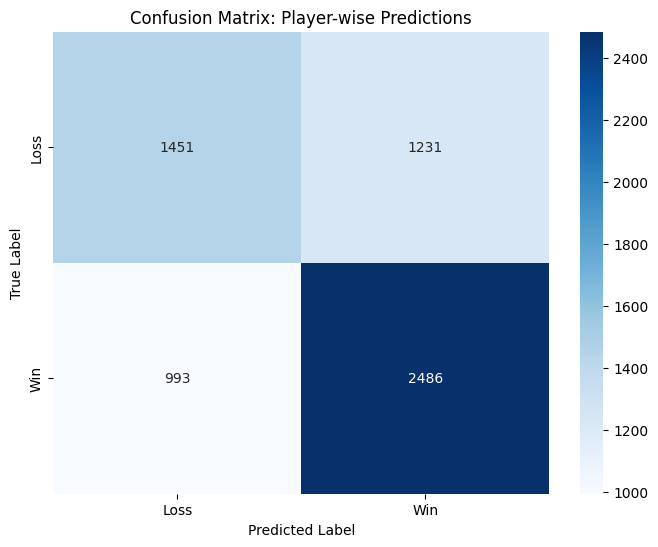

In [20]:
cm_player = confusion_matrix(y_test_player, y_pred_player)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_player, annot=True, fmt="d", cmap="Blues", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.title("Confusion Matrix: Player-wise Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()